In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()

##Importing Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your API Key")
project = rf.workspace("selfdriving-car-qtywx").project("self-driving-cars-lfjou")
version = project.version(6)
dataset = version.download("yolov8")


##Training the YOLOv8

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=10 imgsz=640 batch=16 # resolution 640x640

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

##Display some results

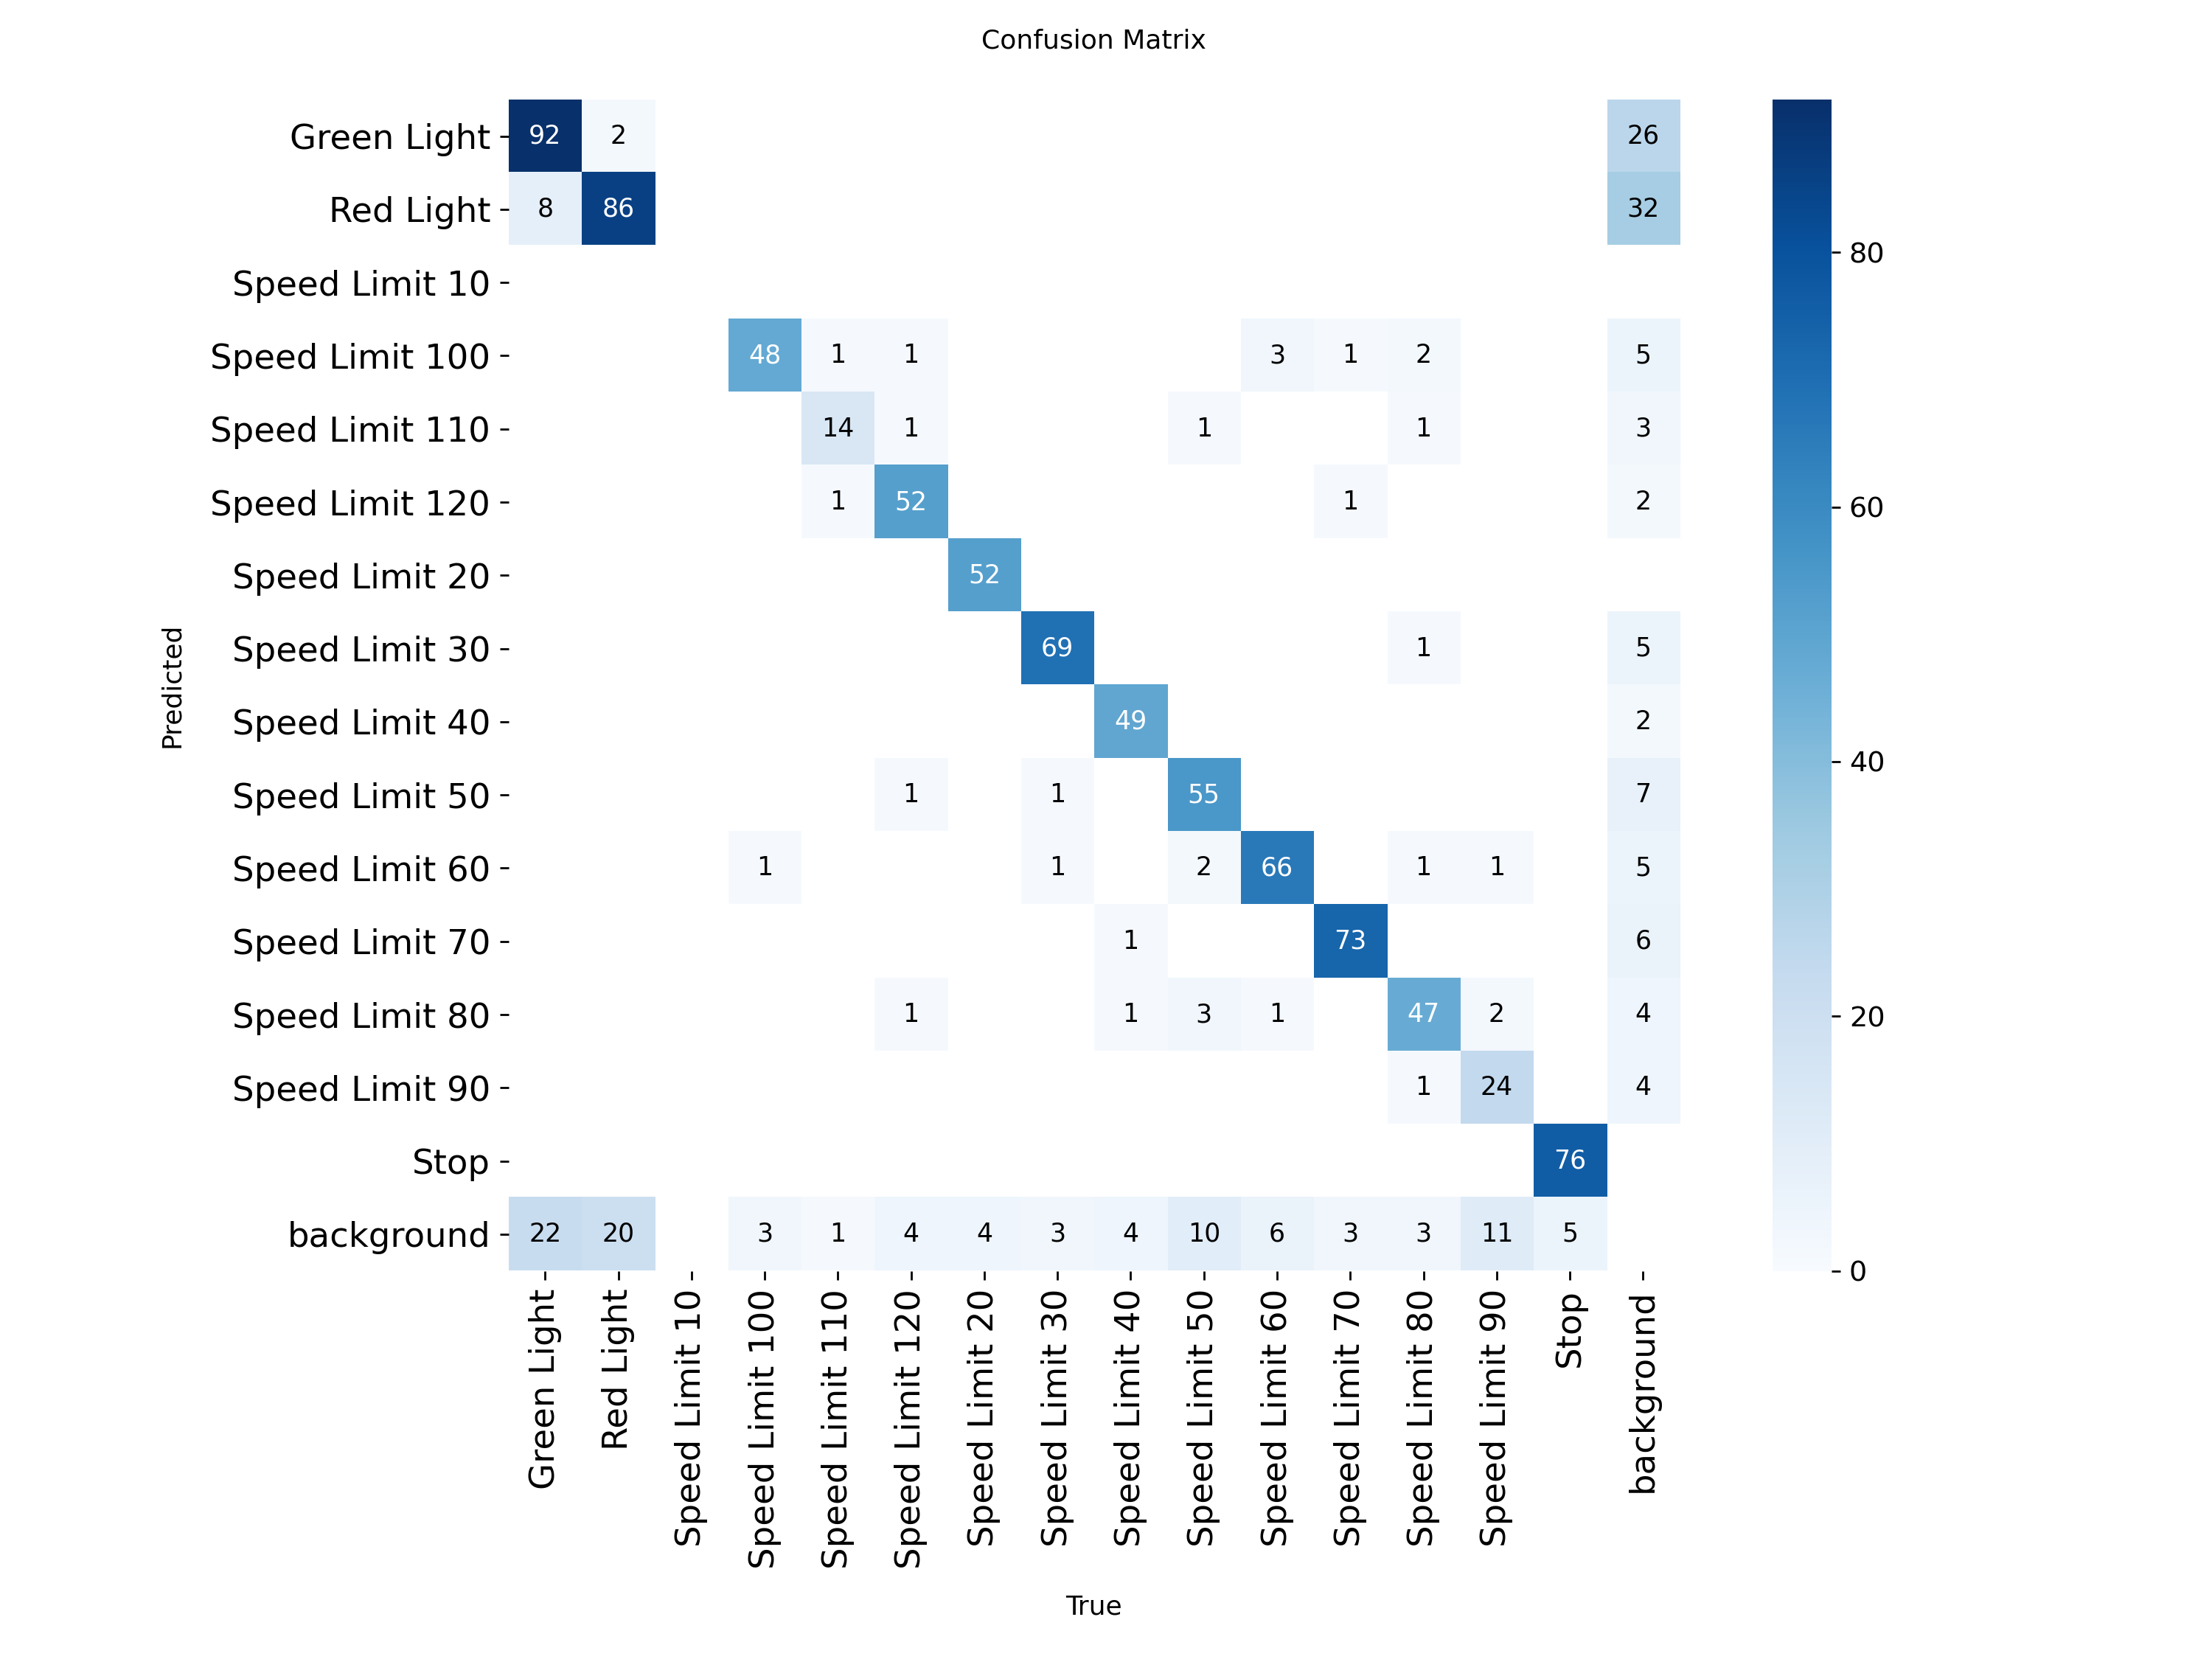

In [ ]:
resultdata = "/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train"

from IPython.display import Image, display

Image(filename=f'{resultdata}/confusion_matrix.png', width=800)

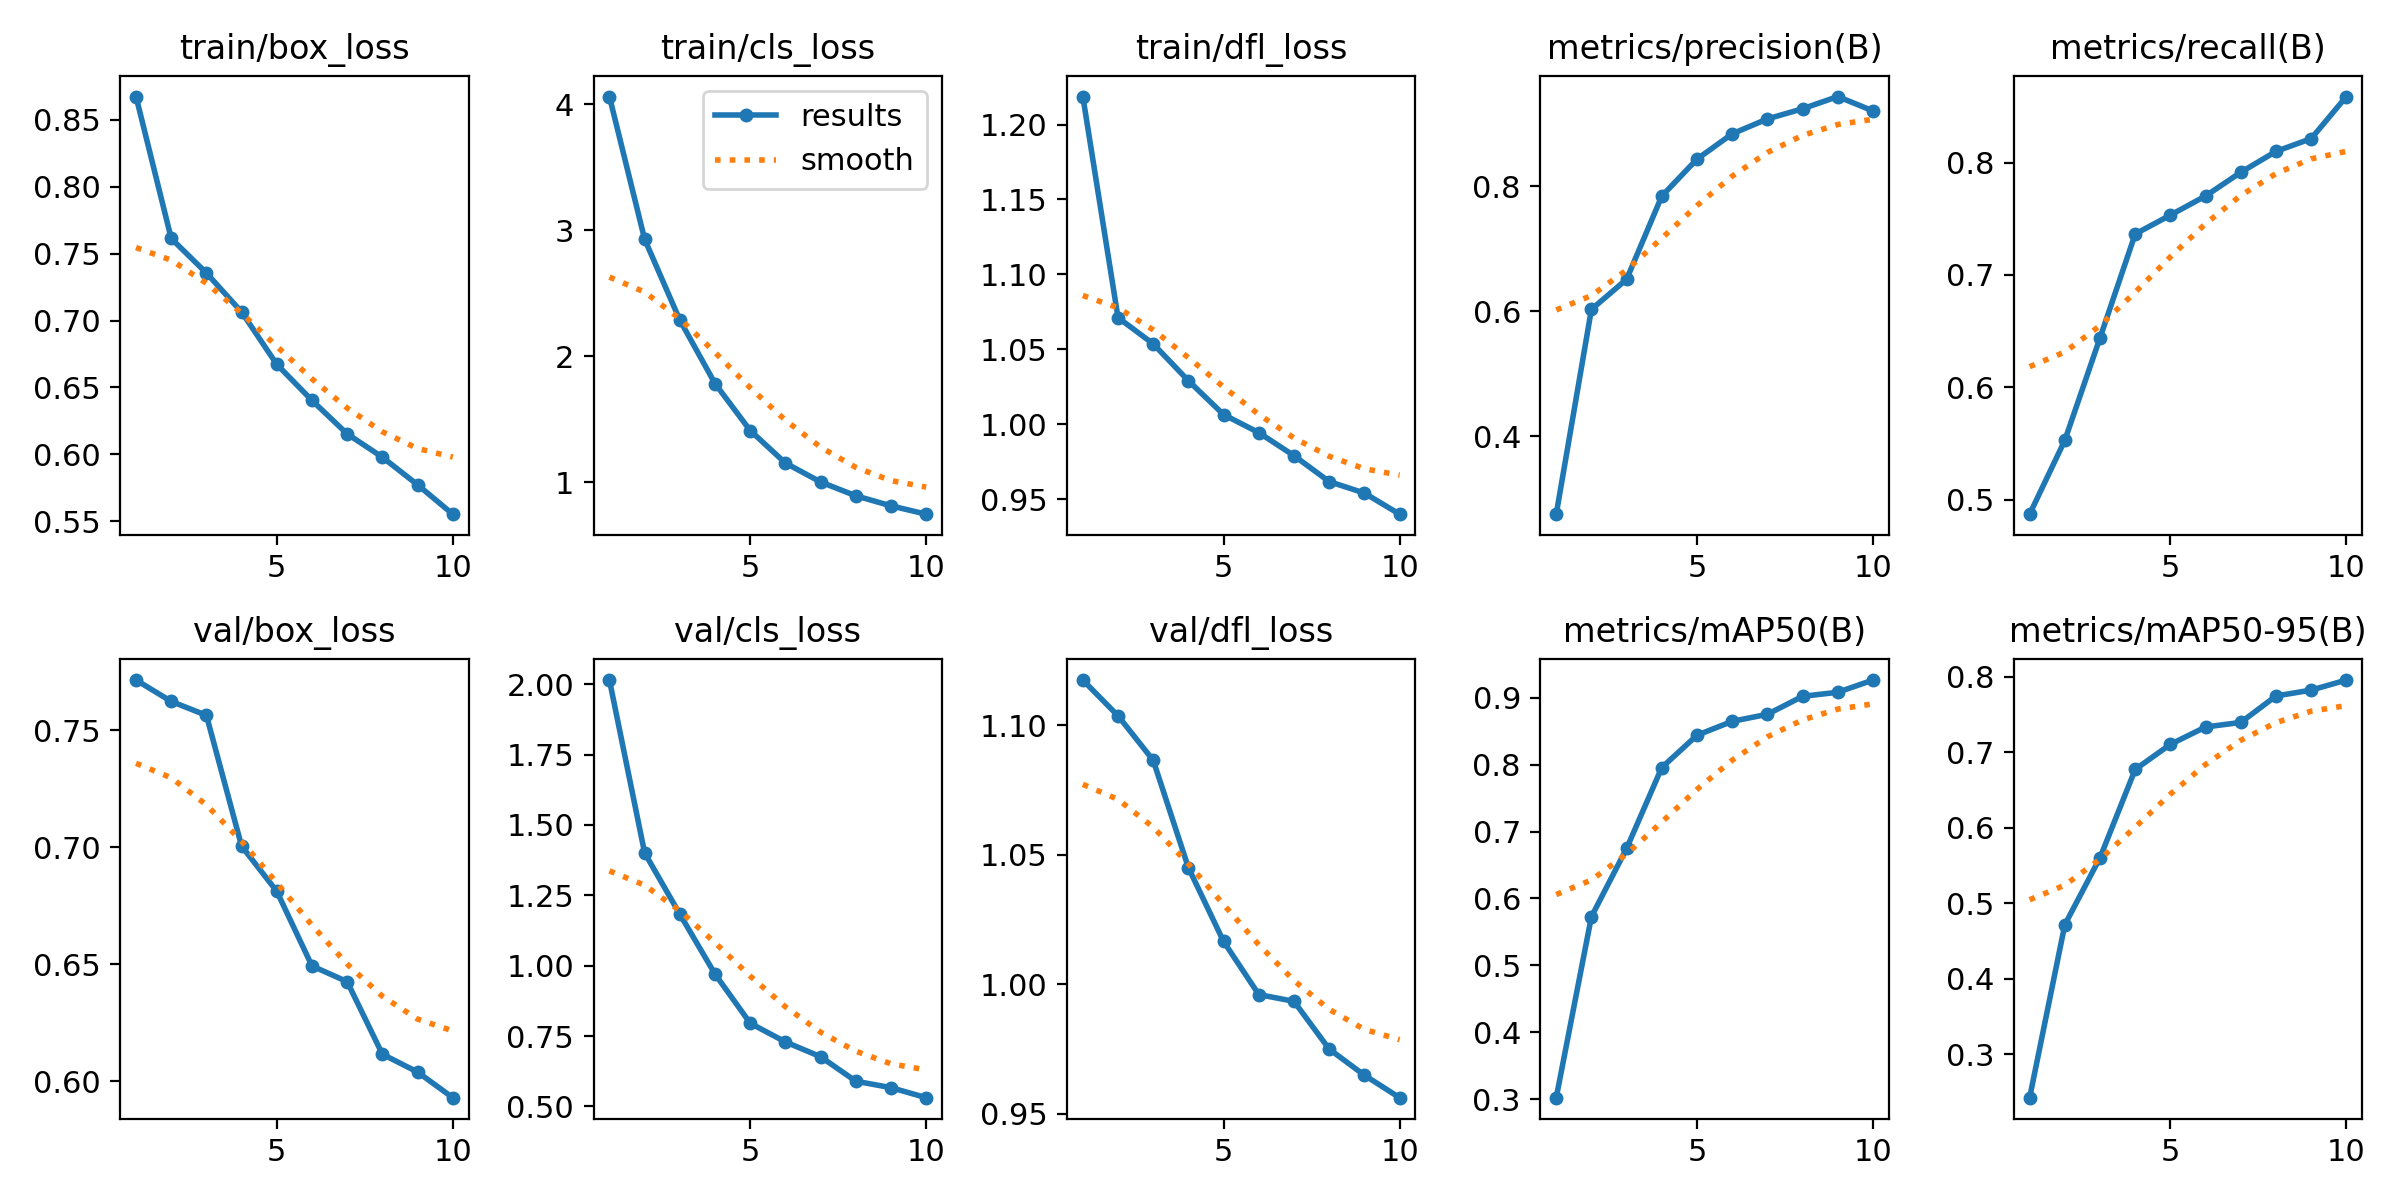

In [ ]:
Image(filename=f'{resultdata}/results.png')

In [ ]:
import pandas as pd

df=pd.read_csv(f'{resultdata}/results.csv')
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,71.4659,0.86753,4.06256,1.21872,0.27528,0.48695,0.30232,0.24249,0.77141,2.01447,1.11755,0.000175,0.000175,0.000175
1,2,134.6580,0.76139,2.92993,1.07112,0.60316,0.55272,0.57273,0.47169,0.76228,1.40059,1.10373,0.000315,0.000315,0.000315
2,3,196.5230,0.73558,2.28853,1.05358,0.65133,0.64395,0.67473,0.56055,0.75632,1.18282,1.08654,0.000421,0.000421,0.000421
3,4,259.2460,0.70642,1.78425,1.02895,0.78448,0.73641,0.79563,0.67750,0.70043,0.97017,1.04505,0.000370,0.000370,0.000370
4,5,321.6540,0.66727,1.41150,1.00636,0.84368,0.75324,0.84384,0.71077,0.68111,0.79550,1.01655,0.000318,0.000318,0.000318


In [ ]:
df.tail(1)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
9,10,631.027,0.55526,0.74738,0.93988,0.92088,0.85879,0.9263,0.79595,0.59293,0.53101,0.95621,0.000057,0.000057,0.000057


##Testing the Model

In [ ]:
WeightsPath = '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights'

!yolo task=detect mode=predict model={WeightsPath}/best.pt conf=0.25 source='/content/2.png'

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/2.png: 640x544 1 Stop, 81.0ms
Speed: 7.2ms preprocess, 81.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 544)
Results saved to /content/ManualTestingData/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from google.colab import files

file_path = '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights/best.pt'

files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

model = YOLO('/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights/best.pt')

model.export(format='onnx')

In [ ]:
from google.colab import files

# The path usually increments (train, train2, train3) if you trained multiple times.
# Check the file pane on the left to be sure.
file_path = '/content/RoadSignDetection/Self-Driving-Cars-6/runs/detect/train/weights/best.onnx'

files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>